# N-BEATS for Time Series Forecasting in Python

/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/t

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Backtest Results:
MAPE: 10.35%
RMSE: 6.34
MAE: 5.69


Predicting: |          | 0/? [00:00<?, ?it/s]

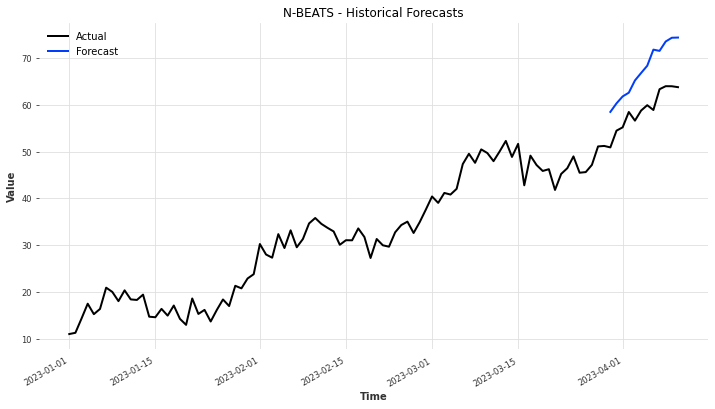

<Figure size 720x432 with 0 Axes>

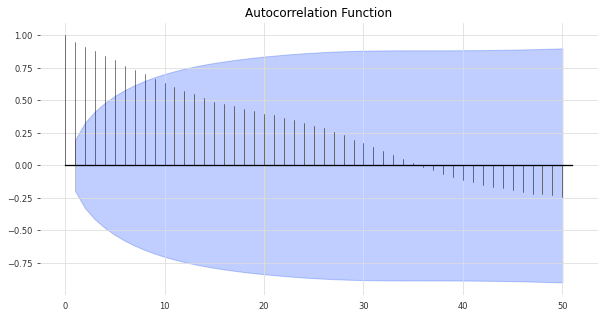

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape, rmse, mae
from darts.utils.statistics import plot_acf

# Generate synthetic time series data
np.random.seed(42)
time = pd.date_range(start="2023-01-01", periods=100, freq="D")
data = 10 + 0.5 * np.arange(100) + 5 * np.sin(2 * np.pi * np.arange(100) / 30) + np.random.normal(scale=2, size=100)
df = pd.DataFrame({"Date": time, "Value": data})

# Create a TimeSeries object
series = TimeSeries.from_dataframe(df, time_col="Date", value_cols="Value")

# Split the data into train and test sets
train, test = series.split_before(0.8)

# Initialize the N-BEATS model
model = NBEATSModel(input_chunk_length=30, output_chunk_length=10, n_epochs=50, random_state=42)

# Fit the model
model.fit(train)

# Perform backtesting
backtest_results = model.backtest(
    series,
    start=0.8,  # Use 80% of the data for the first training
    forecast_horizon=10,
    stride=1,
    retrain=False,  # We've already fitted the model, so we don't need to retrain
    verbose=True,
    metric=[mape, rmse, mae],  # Using multiple metrics
)

# Print the backtest results
print("Backtest Results:")
print(f"MAPE: {backtest_results[0]:.2f}%")
print(f"RMSE: {backtest_results[1]:.2f}")
print(f"MAE: {backtest_results[2]:.2f}")

# Generate historical forecasts for plotting
historical_forecasts = model.historical_forecasts(
    series,
    start=0.8,
    forecast_horizon=10,
    stride=1,
    retrain=False,
    verbose=True,
)

# Plot the results
plt.figure(figsize=(12, 6))
series.plot(label="Actual")
historical_forecasts.plot(label="Forecast")
plt.title("N-BEATS - Historical Forecasts")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("NBEATS_Backtest.png")
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(series, max_lag=50)
plt.title("Autocorrelation Function")
plt.savefig("ACF_plot.png")
plt.show()



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.5 M  | train
-------------------------------------------------------------
6.5 M     Trainable params
1.6 K     Non-trainable params
6.5 M     Total params
25.925    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Multivariate Backtest Results:
MAPE: 9.52%
RMSE: 3.01
MAE: 2.71


Predicting: |          | 0/? [00:00<?, ?it/s]

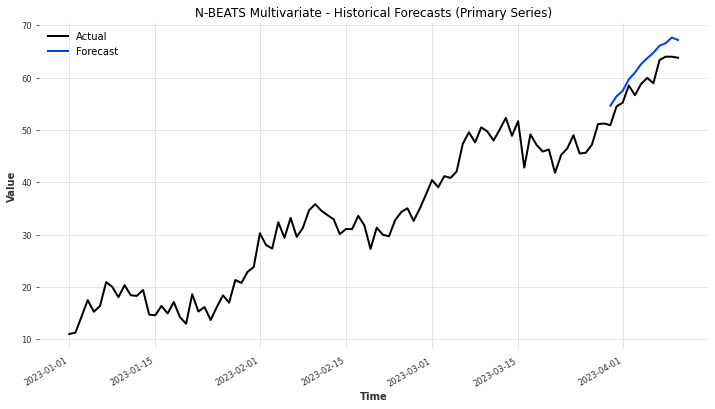

In [2]:
# Multivariate forecasting
# Add a secondary variable (e.g., external temperature)
temperature = 20 + 2 * np.sin(2 * np.pi * np.arange(100) / 30) + np.random.normal(scale=1, size=100)
df["Temperature"] = temperature

# Create a multivariate TimeSeries
multivariate_series = TimeSeries.from_dataframe(df, time_col="Date", value_cols=["Value", "Temperature"])

# Split the multivariate data into train and test sets
multivariate_train, multivariate_test = multivariate_series.split_before(0.8)

# Initialize and train the N-BEATS model for multivariate data
multivariate_model = NBEATSModel(input_chunk_length=30, output_chunk_length=10, n_epochs=50, random_state=42)
multivariate_model.fit(multivariate_train)

# Perform backtesting on multivariate data
multivariate_backtest_results = multivariate_model.backtest(
    multivariate_series,
    start=0.8,
    forecast_horizon=10,
    stride=1,
    retrain=False,
    verbose=True,
    metric=[mape, rmse, mae],
)

# Print the multivariate backtest results
print("\nMultivariate Backtest Results:")
print(f"MAPE: {multivariate_backtest_results[0]:.2f}%")
print(f"RMSE: {multivariate_backtest_results[1]:.2f}")
print(f"MAE: {multivariate_backtest_results[2]:.2f}")

# Generate historical forecasts for multivariate data
multivariate_historical_forecasts = multivariate_model.historical_forecasts(
    multivariate_series,
    start=0.8,
    forecast_horizon=10,
    stride=1,
    retrain=False,
    verbose=True,
)

# Plot results for the primary series in multivariate forecast
plt.figure(figsize=(12, 6))
multivariate_series["Value"].plot(label="Actual")
multivariate_historical_forecasts["Value"].plot(label="Forecast")
plt.title("N-BEATS Multivariate - Historical Forecasts (Primary Series)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("NBEATS_Multivariate_Backtest.png")
plt.show()
